In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## import primary library in python

In [2]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # High-level data visualization based on matplotlib

from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import OneHotEncoder  # Encoding categorical features
from sklearn.compose import ColumnTransformer  # Applying transformers to columns
from sklearn.pipeline import Pipeline  # Assembling steps for cross-validation
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Machine learning algorithm for classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score  # Cross-validation for evaluating scores


pd.set_option('display.max_rows', None)  # Display all rows in pandas DataFrame

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

## Import Titanic dataset:

In [3]:
# Read the CSV files into pandas DataFrames
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
gender_submission_df = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")


In [4]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


## Statistical Data

In [6]:
print(train_df.describe())
print(test_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [7]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

# Exploratory data analysis (EDA)

In [8]:
# Function for Finding missing value
def plot_missing_data(dataset, title):
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(title)  
    sns.heatmap(dataset.isnull(), cbar=False)

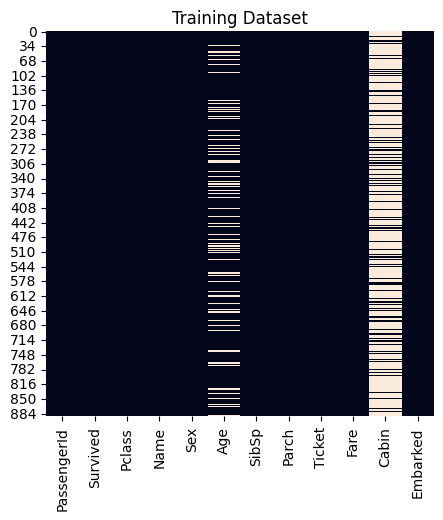

In [9]:
plot_missing_data(train_df, "Training Dataset")

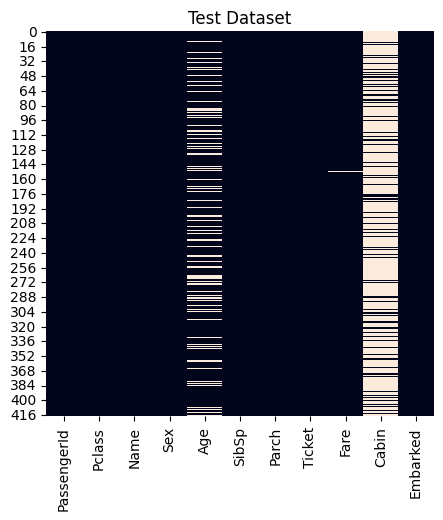

In [10]:
plot_missing_data(test_df, "Test Dataset")

In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
# Make a Function for Barchart to visualized 

def bar_chart_stacked(dataset, feature, stacked=True):
    alive = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df_alive_dead = pd.DataFrame([alive, dead])
    df_alive_dead.index = ['Passengers Alive', 'Passengers Died']
    
    ax = df_alive_dead.plot(kind='bar', stacked=stacked, figsize=(8, 5))
    
    # Annotate the bars with the counts for each segment
    for container in ax.containers:
        ax.bar_label(container, label_type='center')
    
    # Calculate and annotate the total count for each bar
    totals = df_alive_dead.sum(axis=1)
    for i, total in enumerate(totals):
        ax.text(i, total + 1, str(total), ha='center', va='bottom', weight='bold')
    
    plt.title(f'Stacked Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Passengers')
    plt.show()

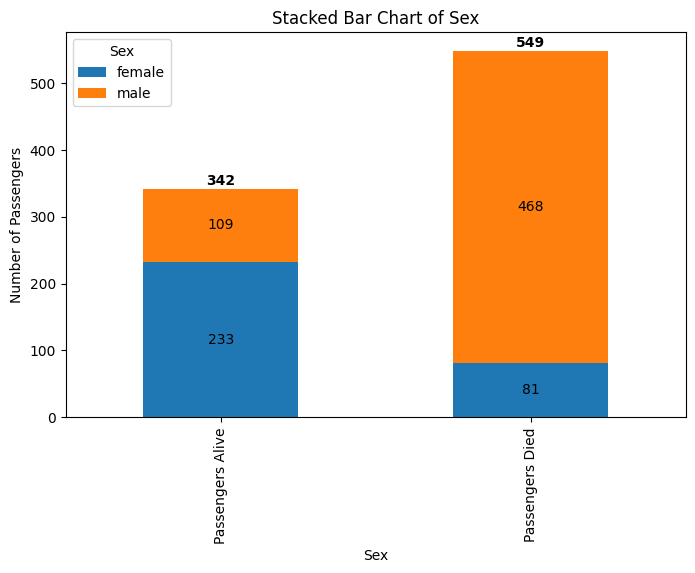

In [14]:
bar_chart_stacked(train_df, 'Sex')

In [15]:
train_df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

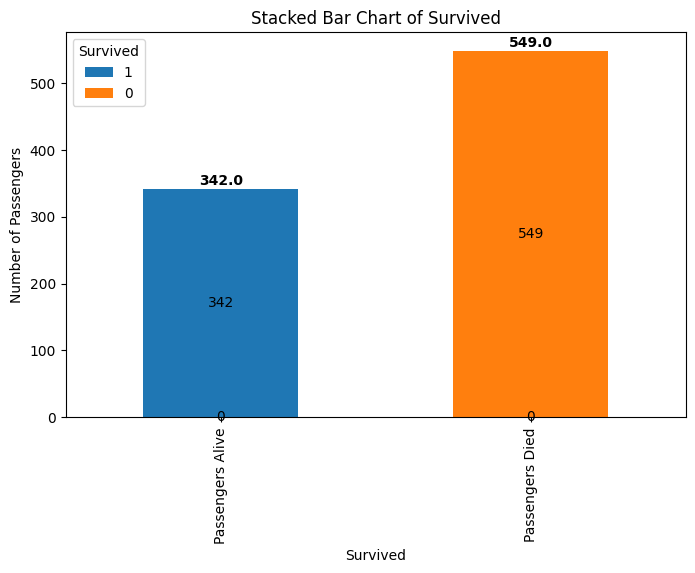

In [16]:
bar_chart_stacked(train_df, "Survived")

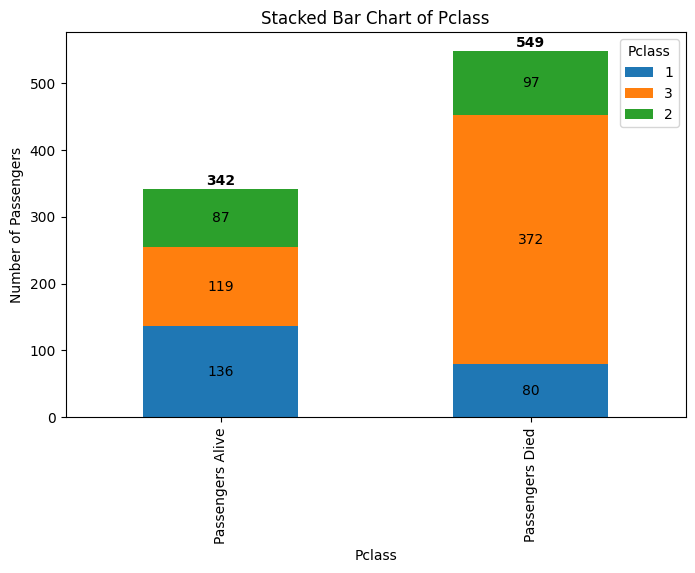

In [17]:
#Analyze Feature Pclass:
bar_chart_stacked(train_df, 'Pclass')

In [18]:
pd.pivot_table(train_df, index='Survived', columns='Pclass', values='PassengerId', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [19]:
train_df.groupby(['Pclass']).Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Observation:

### From the plots and tables presented above, it becomes evident that the passenger class (Pclass) is a significant factor to consider when analyzing survival rates. The data indicates a clear correlation between a passenger's class and their likelihood of survival.

Passengers in higher classes (e.g., 1st class) tend to have higher survival rates compared to those in lower classes (e.g., 3rd class).

In [20]:
# Function for Barchart Compare
def bar_compare(dataset, feature1, feature2=None):
    plt.figure(figsize = [5,5])
    g = sns.barplot(x=feature1, y='Survived', hue=feature2, ci=None, data=dataset).set_ylabel('Survival rate')

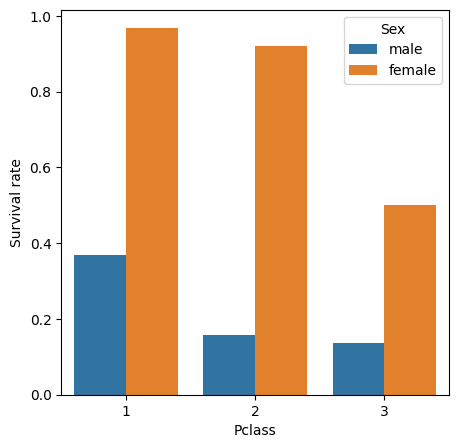

In [21]:
bar_compare(train_df, "Pclass", "Sex")

In [22]:
pd.pivot_table(train_df, index = 'Survived', columns = ['Pclass', "Sex"], values = 'PassengerId' ,aggfunc ='count')

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

In [23]:
train_df.groupby(['Pclass']).Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [24]:
pd.crosstab(train_df['Sex'], train_df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [25]:
pd.crosstab(train_df['Pclass'], train_df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [26]:
train_df.groupby(['Pclass', "Sex"]).Survived.mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

#### From the plots and tables above, it becomes clear that the Pclass and Sex is an important factor to consider.
## Here Analyze Age, is it importent?

In [27]:
# Bell curve
def plot_distribution(dataset, feature, title, bins = 30, hist = True, fsize = (5,5), fize = (155)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    sns.distplot(train_df[feature], color='g', bins=bins, ax=ax)

In [28]:
# Age Distribution Surived vs Died
def plot_kernel_density_estimate_survivors(dataset, feature1, title, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title) 
    sns.kdeplot(dataset[feature1].loc[train_df["Survived"] == 1],color='g',
                shade= True, ax=ax, label='Survived').set_xlabel(feature1)
    sns.kdeplot(dataset[feature1].loc[train_df["Survived"] == 0],
                shade=True, ax=ax, label="Died" , color='r')

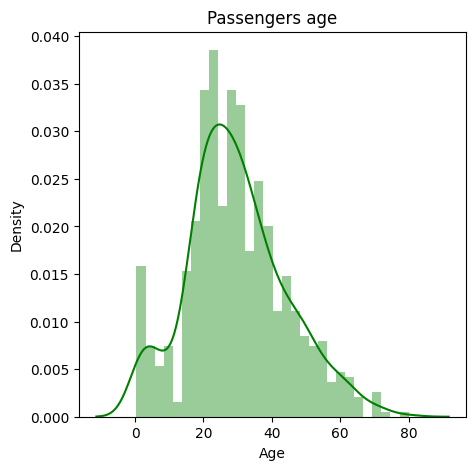

In [29]:
plot_distribution(train_df, 'Age', "Passengers age")

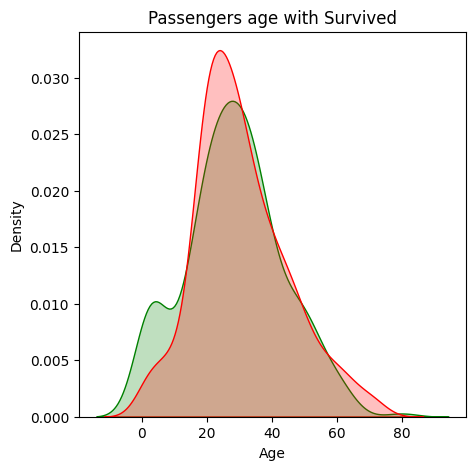

In [30]:
plot_kernel_density_estimate_survivors(train_df, 'Age', "Passengers age with Survived")

## To analyze the features "Age" and "Sex" together and visualize their impact

In [31]:
def swarmplot_survivors(dataset, feature1, feature2, title):
    fig, ax = plt.subplots(figsize=(18,5))
    # Turns off grid on the left Axis.
    ax.grid(True)
    plt.xticks(list(range(0,100,2)))
    sns.swarmplot(y=feature1, x=feature2, hue='Survived', hue_order=[1, 0],palette={1: 'green', 0: 'red'}, data=train_df).set_title(title)

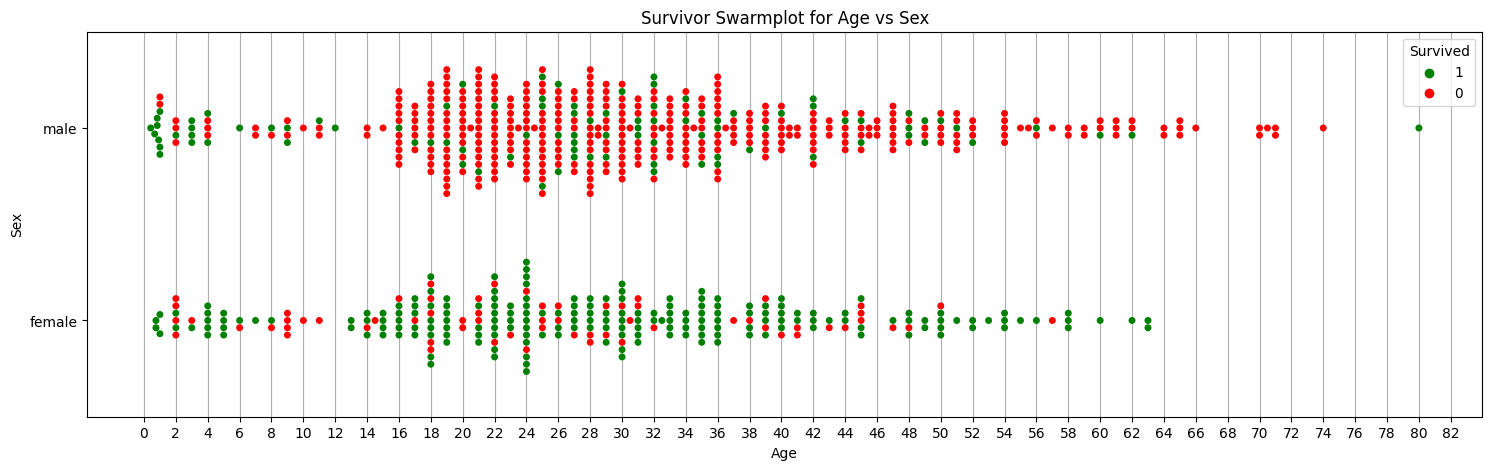

In [32]:
swarmplot_survivors(train_df, 'Sex','Age', "Survivor Swarmplot for Age vs Sex")

# Observations:
## Age Distribution:

There are more young survivors (ages 0-10) in the 'female' category compared to the 'male' category.
The age distribution among males shows a higher concentration in the 20-40 age range.
Females also show a significant concentration in the 20-40 age range but with more survivors than males.

## Survival Rate by Gender:

There are more orange dots (survivors) among females across all age groups, indicating a higher survival rate for females.
Males have more blue dots (non-survivors) compared to females, especially noticeable in the 20-40 age range.

## Outliers:

There are few older individuals (70-80 years) in both categories, with very few survivors.
### -->Analyze Features Age and Pclass together

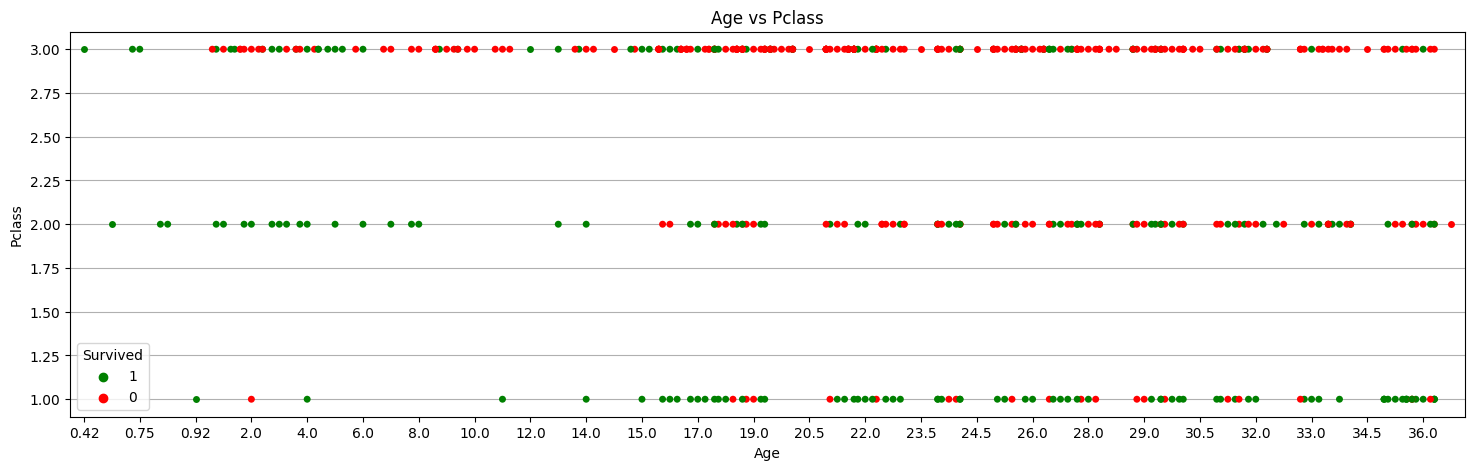

In [33]:
swarmplot_survivors(train_df, 'Pclass', 'Age', 'Age vs Pclass' )

#### First class is more survived then second class with more female
## Analyze  Fare

In [34]:
train_df["Fare"].describe().to_frame()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


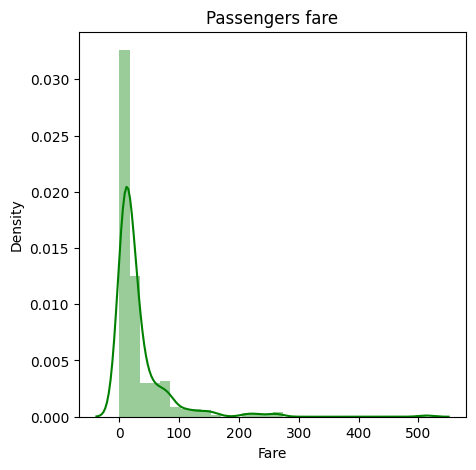

In [35]:
plot_distribution(train_df, 'Fare', "Passengers fare")

### Observation:
The Fare data does not follow a normal distribution and exhibits a significant peak in the price range of $0-$100.

The distribution is skewed to the right, with 75% of fares being under 31USD and a maximum fare of 512USD. Given this skewness, it might be beneficial to normalize this feature, depending on the machine learning model being used. This will be addressed in the feature engineering stage.

To understand how the Fare feature influences the survival rate, we could plot bar charts of Fare vs. Survived. However, due to the wide range of fare values, such a plot may not provide meaningful insights.

A more effective visualization would involve categorizing the fare values and then plotting these categories against the survival rate.

In [36]:
def plot_quartiles(dataset, feature, title, categories):
    fig, axarr = plt.subplots(figsize=(5,5))
    fare_ranges = pd.qcut(dataset[feature], len(categories), labels = categories) #. [0, .25, .5, .75, 1.]
    axarr.set_title(title)
    sns.barplot(x=fare_ranges, y=dataset.Survived, ci=None, ax=axarr).set_ylabel('Survival rate')

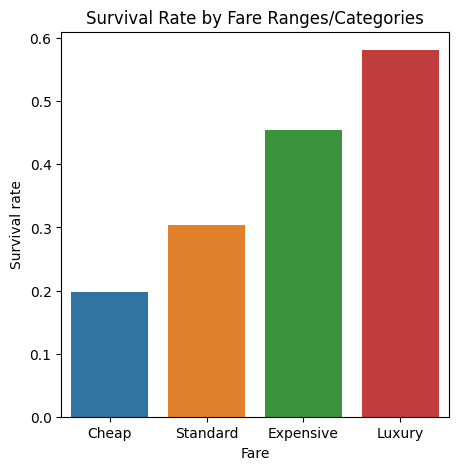

In [37]:
categories = ['Cheap', 'Standard', 'Expensive', 'Luxury']

plot_quartiles(train_df, "Fare", "Survival Rate by Fare Ranges/Categories", categories)

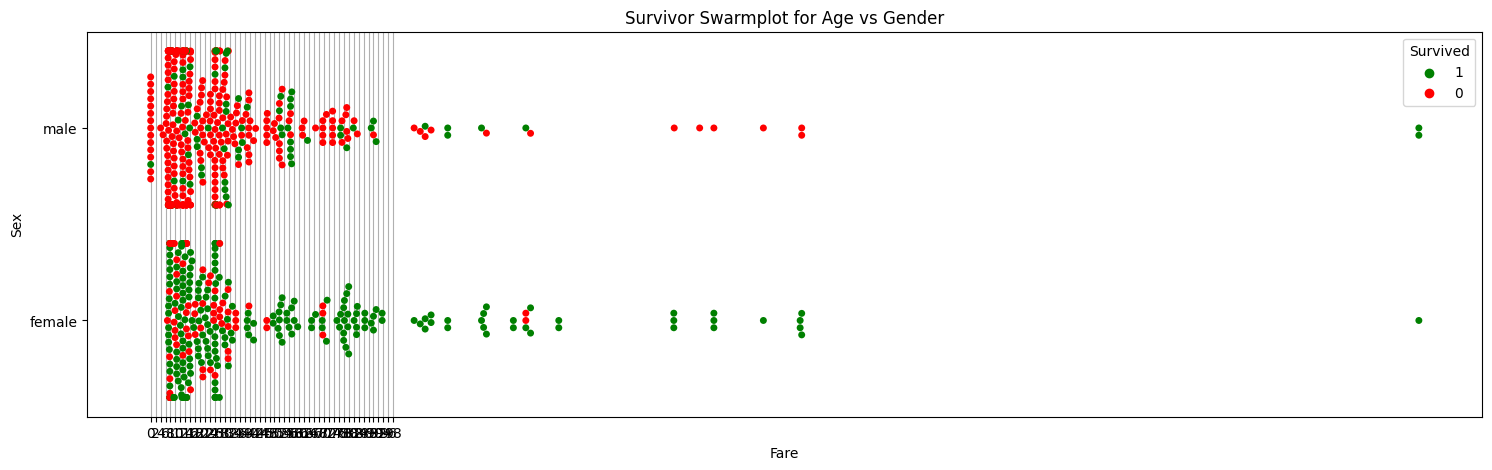

In [38]:
swarmplot_survivors(train_df, "Sex", "Fare","Survivor Swarmplot for Age vs Gender")

In [39]:
train_df.Fare.value_counts()

Fare
8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
7.2292      15
0.0000      15
26.5500     15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
9.5000       9
16.1000      9
24.1500      8
15.5000      8
14.4542      7
69.5500      7
52.0000      7
7.0500       7
56.4958      7
14.5000      7
31.2750      7
39.6875      6
7.7958       6
27.9000      6
30.0000      6
46.9000      6
26.2500      6
21.0000      6
27.7208      5
29.1250      5
15.2458      5
73.5000      5
30.5000      5
53.1000      5
39.0000      4
90.0000      4
15.8500      4
13.5000      4
7.5500       4
23.0000      4
12.4750      4
25.4667      4
7.1250       4
7.6500       4
21.0750      4
7.7333       4
11.5000      4
34.3750      4
7.8792       4
19.2583      4
227.5250     4
27.7500      4
263.0000     4
31.3875      4
79.2000      4
151.5500     4
35.5000      4
120.0000     4
110.8833     4
7.4958       3
83.1583      3
211.3

## Observation:
Fifteen passengers paid no fare, which is unrealistic. Therefore, I will replace the 0 values with NaN and later determine an appropriate method to impute these values

In [40]:
# Replace Fare == 0 with nan
train_df['Fare'] = train_df['Fare'].replace(0, np.nan)
test_df['Fare'] = train_df['Fare'].replace(0, np.nan)

In [41]:
train_df[train_df['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [42]:
test_df[test_df['Fare']==0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Analyze Feature Embarked

In [43]:
def countplot(dataset, feature, title, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    sns.countplot(dataset[feature], ax=ax).set_title(title)
    
def compare_countplot(dataset, feature1, feature2, title):
    fig, ax = plt.subplots(figsize=(5,5))
    p = sns.countplot(x = feature1, hue = feature2, data = dataset, ax=ax).set_title(title) 

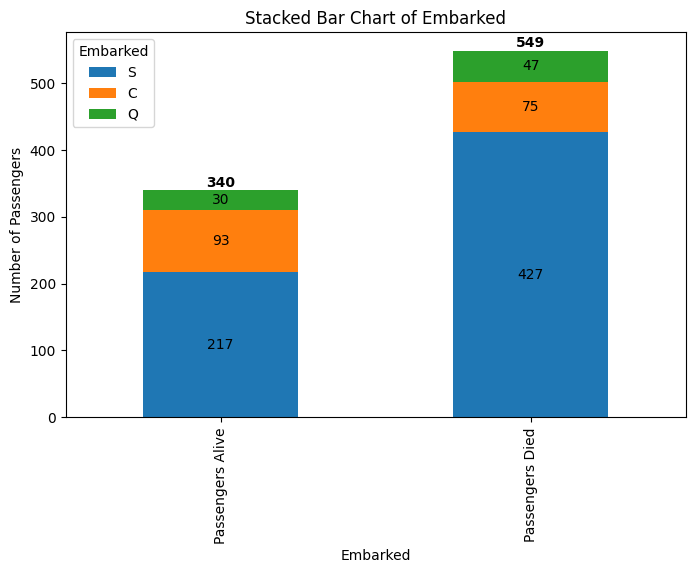

In [44]:
bar_chart_stacked(train_df, 'Embarked')

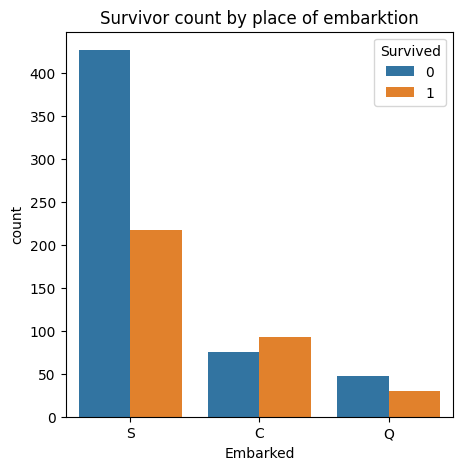

In [45]:
compare_countplot(train_df, "Embarked", "Survived", "Survivor count by place of embarktion")

In [46]:
pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', values = 'PassengerId' ,aggfunc ='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [47]:
len(train_df.query('Embarked == "C" and Survived==1'))

93

In [48]:
train_df.groupby(['Embarked']).Survived.mean().to_frame()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


### Observation:
The Embarked feature includes three values: Southampton, Cherbourg, and Queenstown. Most passengers boarded in Southampton, but only 33% survived. In contrast, Cherbourg had a survival rate of 55%.

It’s not intuitive that the place of boarding would affect survival. Why is it higher for Cherbourg? One possible explanation is the percentage of first-class passengers who embarked there, as first-class status is linked to higher survival rates.
## Analyze Features Embarked & Pclass at a time

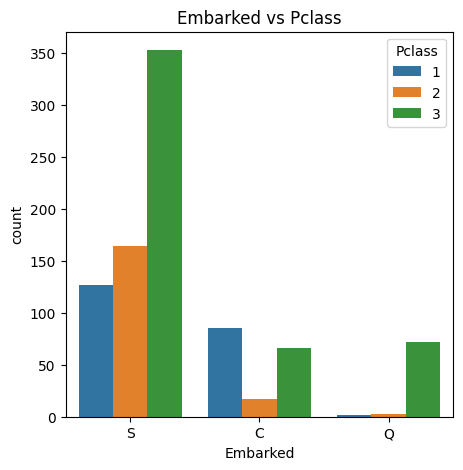

In [49]:
compare_countplot(train_df, 'Embarked', 'Pclass', 'Embarked vs Pclass')

In [50]:
train_df.groupby(['Pclass', 'Embarked', "Sex"]).Survived.sum().to_frame()

Survived
Pclass Embarked Sex             
1      C        female        42
                male          17
       Q        female         1
                male           0
       S        female        46
                male          28
2      C        female         7
                male           2
       Q        female         2
                male           0
       S        female        61
                male          15
3      C        female        15
                male          10
       Q        female        24
                male           3
       S        female        33
                male          34

## General Observations
### Survival by Gender:
Females generally had a higher survival count than males across all classes and ports of embarkation. In Pclass 1, the number of female survivors was notably higher than male survivors. In Pclass 2, the difference is even more pronounced, especially for those who embarked at S (61 females vs. 15 males). In Pclass 3, the trend of higher female survivors continues but with more variation across different embarkation ports. Survival by Embarkation Port:

For Pclass 1 and Pclass 2, the majority of survivors embarked at S (Southampton), followed by C (Cherbourg), with Q (Queenstown) having the least number of survivors. For Pclass 3, the survival count is more evenly distributed among the ports, especially among females. Survival by Passenger Class:

Pclass 1 had relatively high survival counts, particularly among females. Pclass 2 had fewer survivors compared to Pclass 1, but females still had a significant number of survivors. Pclass 3 showed a mixed trend with a considerable number of survivors but more evenly distributed compared to Pclass 1 and 2.

# Analyze Features Embarked & Se

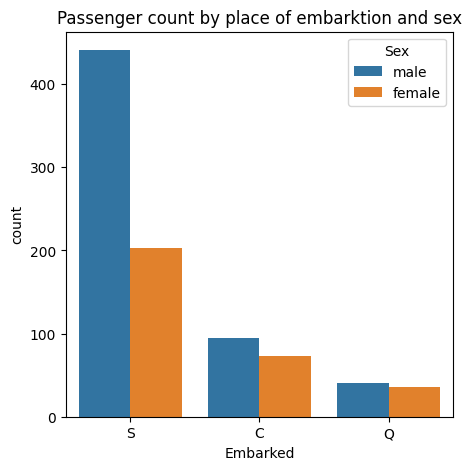

In [51]:
compare_countplot(train_df, "Embarked", "Sex", "Passenger count by place of embarktion and sex")

# Analyze Feature SibSp

In [52]:
train_df['SibSp'].value_counts().to_frame()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


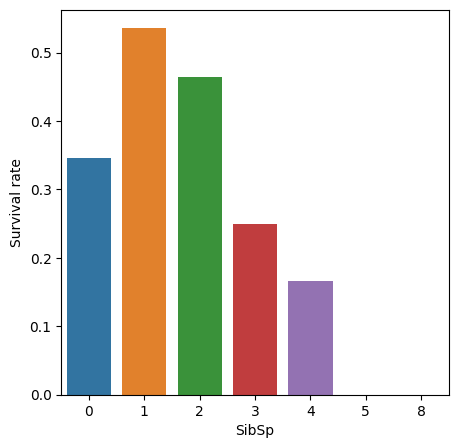

In [53]:
bar_compare(train_df, "SibSp")

In [54]:
train_df.groupby(['SibSp']).Survived.mean().to_frame()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


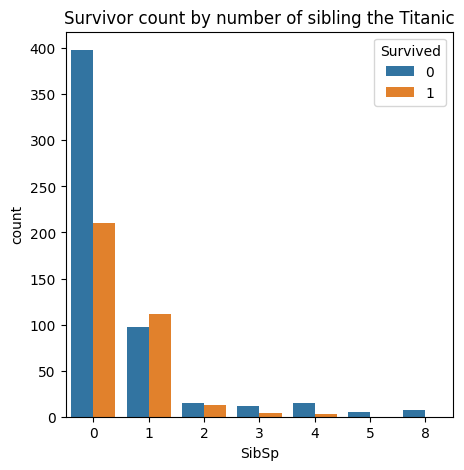

In [55]:
compare_countplot(train_df, "SibSp", "Survived", "Survivor count by number of sibling the Titanic")

# Analyze Feature Parch

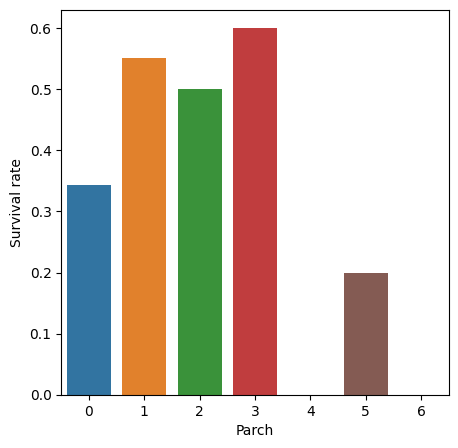

In [56]:
bar_compare(train_df, "Parch")

In [57]:
train_df.groupby(['Parch']).Survived.mean().to_frame()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


## Observation:
This feature, like the SibSp column, represents the number of parents or children each passenger was traveling with. Similar patterns emerge: small families had higher survival rates compared to larger families and passengers traveling alone.

## Feature engineering
## Feature Name:

In [58]:
pd.unique(train_df['Name'])

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

### Extract the Titles from the name.

In [59]:
train_df['Title']=train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_df['Title']=test_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [60]:
train_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs


In [61]:
test_df.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.2500,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,71.2833,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,7.9250,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,53.1000,NaN,S,Mr


In [62]:
train_df['Title'].value_counts().to_frame()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


<Axes: xlabel='Title', ylabel='count'>

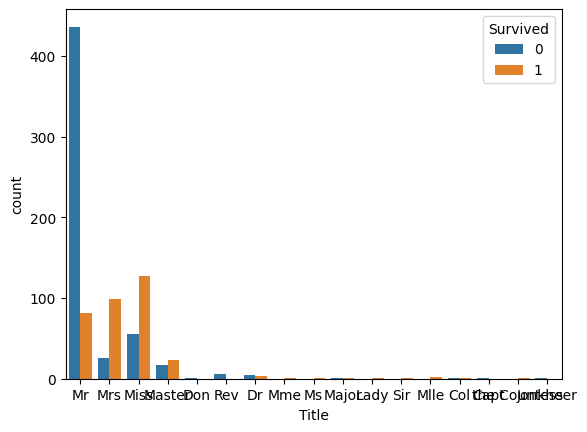

In [63]:
sns.countplot(data=train_df, x= 'Title', hue='Survived')

In [64]:
train_df.groupby(['Title', 'Sex', 'Pclass']).Survived.sum().to_frame()

Survived
Title        Sex    Pclass          
Capt         male   1              0
Col          male   1              1
Don          male   1              0
Dr           female 1              1
             male   1              2
                    2              0
Jonkheer     male   1              0
Lady         female 1              1
Major        male   1              1
Master       male   1              3
                    2              9
                    3             11
Miss         female 1             44
                    2             32
                    3             51
Mlle         female 1              2
Mme          female 1              1
Mr           male   1             37
                    2              8
                    3             36
Mrs          female 1             41
                    2             37
                    3             21
Ms           female 2              1
Rev          male   2              0
Sir          male   1              1
the Countess female 1              1

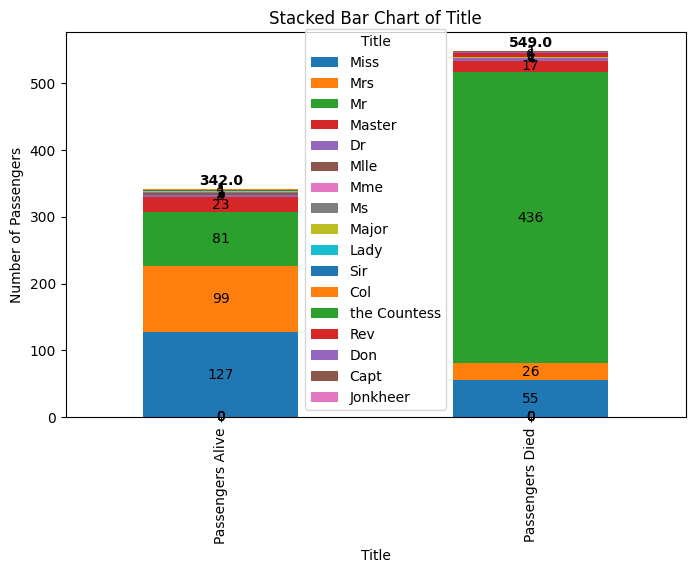

In [65]:
bar_chart_stacked(train_df, 'Title')

In [66]:
train_df['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
test_df['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
train_df['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test_df['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [67]:
train_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs


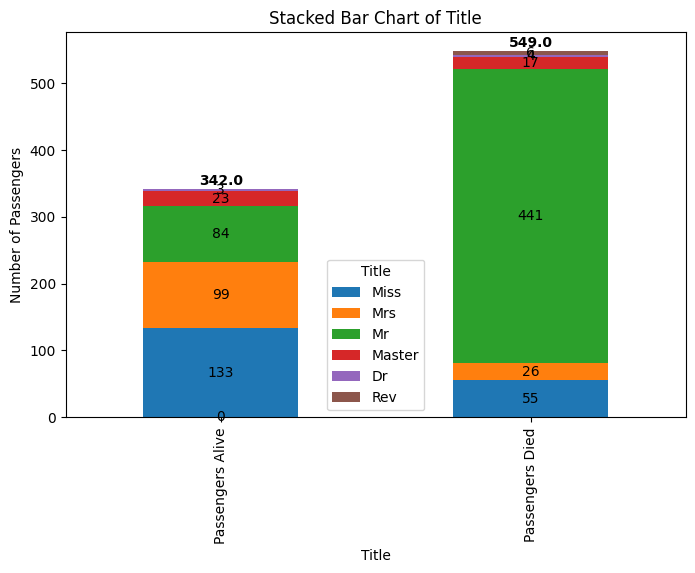

In [68]:
bar_chart_stacked(train_df, 'Title')

In [69]:
train_df.groupby(['Title', 'Sex', 'Pclass']).Survived.sum().to_frame()

Survived
Title  Sex    Pclass          
Dr     female 1              1
       male   1              2
              2              0
Master male   1              3
              2              9
              3             11
Miss   female 1             49
              2             33
              3             51
Mr     male   1             40
              2              8
              3             36
Mrs    female 1             41
              2             37
              3             21
Rev    male   2              0

## Observation:
As expected, female titles correspond to a higher survival rate. Surprisingly, "Master" and "Dr." titles, typically associated with males, also show a relatively high survival rate. In contrast, those with the title "Mr." face a compromised survival rate of approximately 15%. Interestingly, all six individuals with the title "Reverend" perished, possibly indicating a decision to face their fate with dignity.

## Cabin and Ticket

In [70]:
train_df[['Cabin', 'Ticket']]

,Cabin,Ticket
0,NaN,A/5 21171
1,C85,PC 17599
2,NaN,STON/O2. 3101282
3,C123,113803
4,NaN,373450
5,NaN,330877
6,E46,17463
7,NaN,349909
8,NaN,347742
9,NaN,237736


In [71]:
print(f" Null number: {train_df['Cabin'].isnull().sum()}")
print(f" Total number: {train_df['Cabin'].shape[0]}")

 Null number: 687
 Total number: 891


In [72]:
print(f" Null number: {train_df['Ticket'].isnull().sum()}")
print(f" Total number: {train_df['Ticket'].shape[0]}")

 Null number: 0
 Total number: 891


In [73]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [74]:
train_df.query('Cabin.notnull() and Survived==1').count()

PassengerId    136
Survived       136
Pclass         136
Name           136
Sex            136
Age            125
SibSp          136
Parch          136
Ticket         136
Fare           136
Cabin          136
Embarked       134
Title          136
dtype: int64

In [75]:
train_df.query('Cabin.notnull() and Survived==0').count()

PassengerId    68
Survived       68
Pclass         68
Name           68
Sex            68
Age            60
SibSp          68
Parch          68
Ticket         68
Fare           65
Cabin          68
Embarked       68
Title          68
dtype: int64

In [76]:
train_df.query('Cabin.isnull() and Survived==1').count()

PassengerId    206
Survived       206
Pclass         206
Name           206
Sex            206
Age            165
SibSp          206
Parch          206
Ticket         206
Fare           205
Cabin            0
Embarked       206
Title          206
dtype: int64

In [77]:
train_df.query('Cabin.isnull() and Survived==0').count()

PassengerId    481
Survived       481
Pclass         481
Name           481
Sex            481
Age            364
SibSp          481
Parch          481
Ticket         481
Fare           470
Cabin            0
Embarked       481
Title          481
dtype: int64

In [78]:
train_df['cabin_replace_num'] = train_df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
test_df['cabin_replace_num'] = test_df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

### I think the ticket feature doesn't matter much

In [79]:
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

## Feature Family Size

In [80]:
train_df['Fam_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Fam_size'] = test_df['SibSp'] + test_df['Parch'] + 1

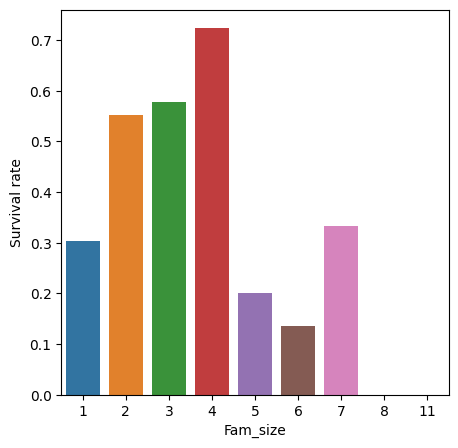

In [81]:
bar_compare(train_df, "Fam_size")

### Make Family Type

In [82]:
# Make of four groups
train_df['Fam_type'] = pd.cut(train_df.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test_df['Fam_type'] = pd.cut(test_df.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

In [83]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,cabin_replace_num,Fam_size,Fam_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,1,Solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,1,Solo


In [84]:
train_df.drop(['Name', 'SibSp', 'Parch','Fam_size'], axis=1, inplace=True)
test_df.drop(['Name', 'SibSp', 'Parch','Fam_size'], axis=1, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,cabin_replace_num,Fam_type
0,1,0,3,male,22.0,A/5 21171,7.2500,S,Mr,0,Small
1,2,1,1,female,38.0,PC 17599,71.2833,C,Mrs,1,Small
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,S,Miss,0,Solo
3,4,1,1,female,35.0,113803,53.1000,S,Mrs,1,Small
4,5,0,3,male,35.0,373450,8.0500,S,Mr,0,Solo


In [85]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId            0
Survived               0
Pclass                 0
Sex                    0
Age                  177
Ticket                 0
Fare                  15
Embarked               2
Title                  0
cabin_replace_num      0
Fam_type               0
dtype: int64
PassengerId           0
Pclass                0
Sex                   0
Age                  86
Ticket                0
Fare                  6
Embarked              0
Title                 0
cabin_replace_num     0
Fam_type              0
dtype: int64


In [86]:
total_df=pd.concat([train_df, test_df])

In [87]:
total_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,cabin_replace_num,Fam_type
0,1,0.0,3,male,22.0,A/5 21171,7.2500,S,Mr,0,Small
1,2,1.0,1,female,38.0,PC 17599,71.2833,C,Mrs,1,Small
2,3,1.0,3,female,26.0,STON/O2. 3101282,7.9250,S,Miss,0,Solo
3,4,1.0,1,female,35.0,113803,53.1000,S,Mrs,1,Small
4,5,0.0,3,male,35.0,373450,8.0500,S,Mr,0,Solo


In [88]:
total_df['Survived'].isnull().sum()

418

In [89]:
total_df['Survived'].notnull().sum()

891

In [90]:
# Calculate the mean fare for each Pclass
mean_fare_per_class = total_df.groupby('Pclass')['Fare'].transform('mean')

In [91]:
total_df['Fare']=total_df['Fare'].fillna(mean_fare_per_class)

In [92]:
total_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,cabin_replace_num,Fam_type
0,1,0.0,3,male,22.0,A/5 21171,7.2500,S,Mr,0,Small
1,2,1.0,1,female,38.0,PC 17599,71.2833,C,Mrs,1,Small
2,3,1.0,3,female,26.0,STON/O2. 3101282,7.9250,S,Miss,0,Solo
3,4,1.0,1,female,35.0,113803,53.1000,S,Mrs,1,Small
4,5,0.0,3,male,35.0,373450,8.0500,S,Mr,0,Solo


In [93]:
total_df.query('Pclass==1 and Fare.isnull()')

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,cabin_replace_num,Fam_type


In [94]:
total_df.query('Pclass==2 and Fare.isnull()')

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,cabin_replace_num,Fam_type


In [95]:
total_df.query('Pclass==3 and Fare.isnull()')

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,cabin_replace_num,Fam_type


In [96]:
print(total_df.isnull().sum())

PassengerId            0
Survived             418
Pclass                 0
Sex                    0
Age                  263
Ticket                 0
Fare                   0
Embarked               2
Title                  0
cabin_replace_num      0
Fam_type               0
dtype: int64


In [97]:
#total_df['Embarked'] = total_df['Embarked'].fillna(total_df['Embarked'].mode())
total_df['Embarked'] = total_df['Embarked'].fillna(total_df['Embarked'].mode()[0])

In [98]:
total_df.query('Age.notnull() and Survived==1')

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,cabin_replace_num,Fam_type
1,2,1.0,1,female,38.00,PC 17599,71.283300,C,Mrs,1,Small
2,3,1.0,3,female,26.00,STON/O2. 3101282,7.925000,S,Miss,0,Solo
3,4,1.0,1,female,35.00,113803,53.100000,S,Mrs,1,Small
8,9,1.0,3,female,27.00,347742,11.133300,S,Mrs,0,Small
9,10,1.0,2,female,14.00,237736,30.070800,C,Mrs,0,Small
10,11,1.0,3,female,4.00,PP 9549,16.700000,S,Miss,1,Small
11,12,1.0,1,female,58.00,113783,26.550000,S,Miss,1,Solo
15,16,1.0,2,female,55.00,248706,16.000000,S,Mrs,0,Solo
21,22,1.0,2,male,34.00,248698,13.000000,S,Mr,1,Solo
22,23,1.0,3,female,15.00,330923,8.029200,Q,Miss,0,Solo


In [99]:
total_df.query('Age.notnull() and Survived==0')

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,cabin_replace_num,Fam_type
0,1,0.0,3,male,22.0,A/5 21171,7.250000,S,Mr,0,Small
4,5,0.0,3,male,35.0,373450,8.050000,S,Mr,0,Solo
6,7,0.0,1,male,54.0,17463,51.862500,S,Mr,1,Solo
7,8,0.0,3,male,2.0,349909,21.075000,S,Master,0,Big
12,13,0.0,3,male,20.0,A/5. 2151,8.050000,S,Mr,0,Solo
13,14,0.0,3,male,39.0,347082,31.275000,S,Mr,0,Big
14,15,0.0,3,female,14.0,350406,7.854200,S,Miss,0,Solo
16,17,0.0,3,male,2.0,382652,29.125000,Q,Master,0,Big
18,19,0.0,3,female,31.0,345763,18.000000,S,Mrs,0,Small
20,21,0.0,2,male,35.0,239865,26.000000,S,Mr,0,Solo


In [100]:
total_df['Age'] = total_df['Age'].fillna(total_df['Age'].mean())

In [101]:
print(total_df.isnull().sum())

PassengerId            0
Survived             418
Pclass                 0
Sex                    0
Age                    0
Ticket                 0
Fare                   0
Embarked               0
Title                  0
cabin_replace_num      0
Fam_type               0
dtype: int64


In [102]:
train_dataframe=total_df.query('Survived==1 or Survived==0')

In [103]:
train_dataframe.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,cabin_replace_num,Fam_type
0,1,0.0,3,male,22.0,A/5 21171,7.2500,S,Mr,0,Small
1,2,1.0,1,female,38.0,PC 17599,71.2833,C,Mrs,1,Small
2,3,1.0,3,female,26.0,STON/O2. 3101282,7.9250,S,Miss,0,Solo
3,4,1.0,1,female,35.0,113803,53.1000,S,Mrs,1,Small
4,5,0.0,3,male,35.0,373450,8.0500,S,Mr,0,Solo


In [104]:
train_dataframe.shape

(891, 11)

In [105]:
test_dataframe=total_df.query('Survived.isnull()')

In [106]:
test_dataframe.shape

(418, 11)

In [107]:
test_dataframe.drop('Survived', axis=1, inplace=True)

In [108]:
test_dataframe.shape

(418, 10)

In [109]:
print(train_dataframe.isnull().sum())

PassengerId          0
Survived             0
Pclass               0
Sex                  0
Age                  0
Ticket               0
Fare                 0
Embarked             0
Title                0
cabin_replace_num    0
Fam_type             0
dtype: int64


In [110]:
train_dataframe['Sex'] = train_dataframe['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_dataframe['Sex'] = test_dataframe['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [111]:
train_dataframe.drop(['PassengerId','Ticket'],axis=1, inplace=True )
test_dataframe.drop(['PassengerId','Ticket'],axis=1, inplace=True )

In [112]:
train_dataframe.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,cabin_replace_num,Fam_type
0,0.0,3,0,22.0,7.2500,S,Mr,0,Small
1,1.0,1,1,38.0,71.2833,C,Mrs,1,Small
2,1.0,3,1,26.0,7.9250,S,Miss,0,Solo
3,1.0,1,1,35.0,53.1000,S,Mrs,1,Small
4,0.0,3,0,35.0,8.0500,S,Mr,0,Solo


In [113]:
test_dataframe.head()

,Pclass,Sex,Age,Fare,Embarked,Title,cabin_replace_num,Fam_type
0,3,0,34.5,7.2500,Q,Mr,0,Solo
1,3,1,47.0,71.2833,S,Mrs,0,Small
2,2,0,62.0,7.9250,Q,Mr,0,Solo
3,3,0,27.0,53.1000,S,Mr,0,Solo
4,3,1,22.0,8.0500,S,Mrs,0,Small


In [114]:
train_dataframe.Title.value_counts()

Title
Mr        525
Miss      188
Mrs       125
Master     40
Dr          7
Rev         6
Name: count, dtype: int64

### OneHotEncoding and scaling

In [115]:
# Define the columns for OneHotEncoding and scaling
categorical_features = ['Embarked', 'Title', 'Fam_type']
numeric_features = ['Pclass', 'Sex', 'Age', 'Fare', 'cabin_replace_num']

# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Apply the transformations
X = preprocessor.fit_transform(train_dataframe.drop('Survived', axis=1))
y = train_dataframe['Survived']
test_dataframe = preprocessor.transform(test_dataframe)

### Models and their Parameters

In [116]:
# Define models and their parameters
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(),
    'KNeighbors': KNeighborsClassifier()
}

params = {
    'LogisticRegression': {'C': [0.1, 1, 10, 100]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'SVC': {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
    'KNeighbors': {'n_neighbors': [3, 5, 7, 9]}
}

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train models and find best parameters
best_models = {}
best_scores = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid = GridSearchCV(model, params[name], cv=kf, scoring='accuracy')
    grid.fit(X, y)
    best_models[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best score for {name}: {grid.best_score_}")


Training LogisticRegression...
Best parameters for LogisticRegression: {'C': 1}
Best score for LogisticRegression: 0.8327537505492437
Training RandomForest...
Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 50}
Best score for RandomForest: 0.8350134957002071
Training GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'n_estimators': 200}
Best score for GradientBoosting: 0.8473353838428223
Training XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 50}
Best score for XGBoost: 0.8349883874207519
Training SVC...
Best parameters for SVC: {'C': 1, 'kernel': 'rbf'}
Best score for SVC: 0.8338899001945892
Training KNeighbors...
Best parameters for KNeighbors: {'n_neighbors': 7}
Best score for KNeighbors: 0.8383780051471973


In [117]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Evaluate each model
validation_scores = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    validation_scores[name] = accuracy
    print(f"Evaluation of {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_val, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_val, y_pred)}\n")

Evaluation of LogisticRegression:
Accuracy: 0.8379888268156425
Confusion Matrix:
[[97 13]
 [16 53]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       110
         1.0       0.80      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179


Evaluation of RandomForest:
Accuracy: 0.8044692737430168
Confusion Matrix:
[[94 16]
 [19 50]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       110
         1.0       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Evaluation of GradientBoosting:
Accuracy: 0.8100558659217877
Confusion Matrix:
[[98 12]
 [22 47]]
Classi

In [118]:
best_model_name = max(validation_scores, key=validation_scores.get)
best_model = best_models[best_model_name]
print(f"The best model is: {best_model_name} with accuracy: {validation_scores[best_model_name]}")

The best model is: LogisticRegression with accuracy: 0.8379888268156425


In [119]:
# Train the best model on the full training data
best_model.fit(X, y)

LogisticRegression(C=1, max_iter=1000)

In [120]:
# Make predictions
predictions = best_model.predict(test_dataframe)

In [121]:
predictions

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [122]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": predictions.astype('int')
    })

submission.to_csv('submission.csv', index=False)